In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno


In [4]:
file_path = '../data/csv/ENOL_wind_data.csv'
df_ENOL = pd.read_csv(file_path)


In [5]:
# Sjekker informasjon om data framen
df_ENOL.shape
df_ENOL.round(1).info()
df_ENOL.describe(include='all').round(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17708 entries, 0 to 17707
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airport         17708 non-null  object 
 1   Date/time       17708 non-null  object 
 2   Wind_direction  17708 non-null  int64  
 3   Wind_speed      17708 non-null  int64  
 4   Gust_speed      685 non-null    float64
 5   QNH             17708 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 830.2+ KB


,Airport,Date/time,Wind_direction,Wind_speed,Gust_speed,QNH
count,17708,17708,17708.0,17708.0,685.0,17708.0
unique,1,1493,NaN,NaN,NaN,NaN
top,ENOL,291050Z,NaN,NaN,NaN,NaN
freq,17708,14,NaN,NaN,NaN,NaN
mean,NaN,NaN,182.3,11.8,40.3,1007.9
std,NaN,NaN,93.3,7.1,7.4,12.9
min,NaN,NaN,0.0,0.0,19.0,956.0
25%,NaN,NaN,120.0,7.0,35.0,1000.0
50%,NaN,NaN,140.0,11.0,40.0,1008.0
75%,NaN,NaN,260.0,16.0,44.0,1017.0


Oppgave 6: Prediktiv analyse
Denne oppgaven handler om prediktiv analyse og fokuserer på implementeringen av lineær regresjon ved hjelp av scikit-learn for å forutsi fremtidige miljøforhold basert på historiske data. I denne delen av prosjektet skal dere forberede dataene ved å identifisere relevante funksjoner og målvariabler, samt håndtere eventuelle manglende verdier som kan påvirke modellens nøyaktighet. Deretter vil de trene regresjonsmodellen på de rensede dataene, evaluere dens ytelse ved hjelp av passende metoder som beregning av feilmål, og til slutt bruke modellen til å lage prediksjoner for fremtidige miljøforhold.

Vurderingskriterier:

Lag minst tre forskjellige typer visualiseringer (f.eks. linjediagrammer, søylediagrammer og scatterplots) for å representere endringer i eksempelvis luftkvalitet og temperaturdata over tid. Forklar valget av visualiseringstype for hver graf.

Implementer visualiseringer ved hjelp av Matplotlib og Seaborn. Inkluder tilpassede akser, titler, og fargepaletter for å forbedre lesbarheten og estetikk.

** Gjort ** Demonstrer hvordan manglende data håndteres i visualiseringene. Lag en graf som viser hvordan manglende verdier påvirker datatrender, og diskuter hvordan dette kan påvirke tolkningen av dataene.

Skriv en kort evaluering av de utviklede visualiseringene. Diskuter hvilke visualiseringer som var mest effektive for å formidle informasjon, og hvorfor. Reflekter over tilbakemeldinger fra medstudenter eller veileder.

eksempel på analyse https://medium.com/analytics-vidhya/applying-linear-regression-on-a-weather-data-set-e84901120f88

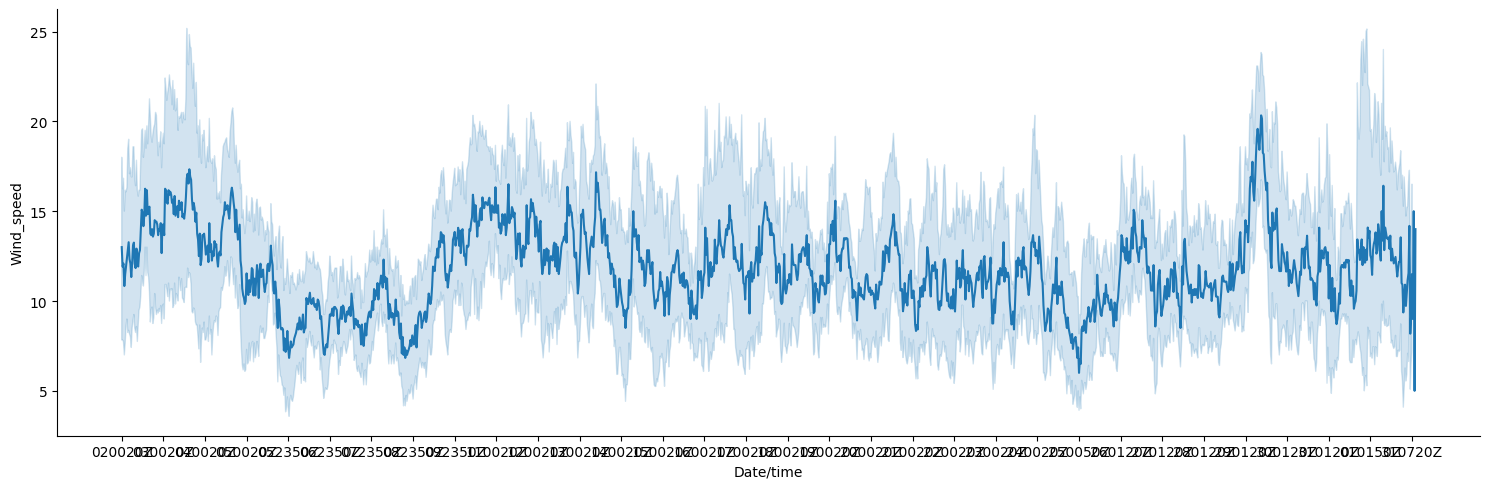

In [6]:
df_hver48 = df_ENOL.iloc[48:]

plot1 = sns.relplot(x="Date/time", y="Wind_speed", kind="line", data=df_hver48, height=5, aspect=3)
plot1.fig.suptitle("", y=1.03)
ticks, labels = plt.xticks()
plt.xticks(ticks[::48], labels[::48])
plt.show()


Tilfeller av missing data
Airport               0
Date/time             0
Wind_direction        0
Wind_speed            0
Gust_speed        17023
QNH                   0
dtype: int64
Tilfeller av registrert data
Airport           17708
Date/time         17708
Wind_direction    17708
Wind_speed        17708
Gust_speed          685
QNH               17708
dtype: int64
Matrise for visualisering av missing data


<Axes: >

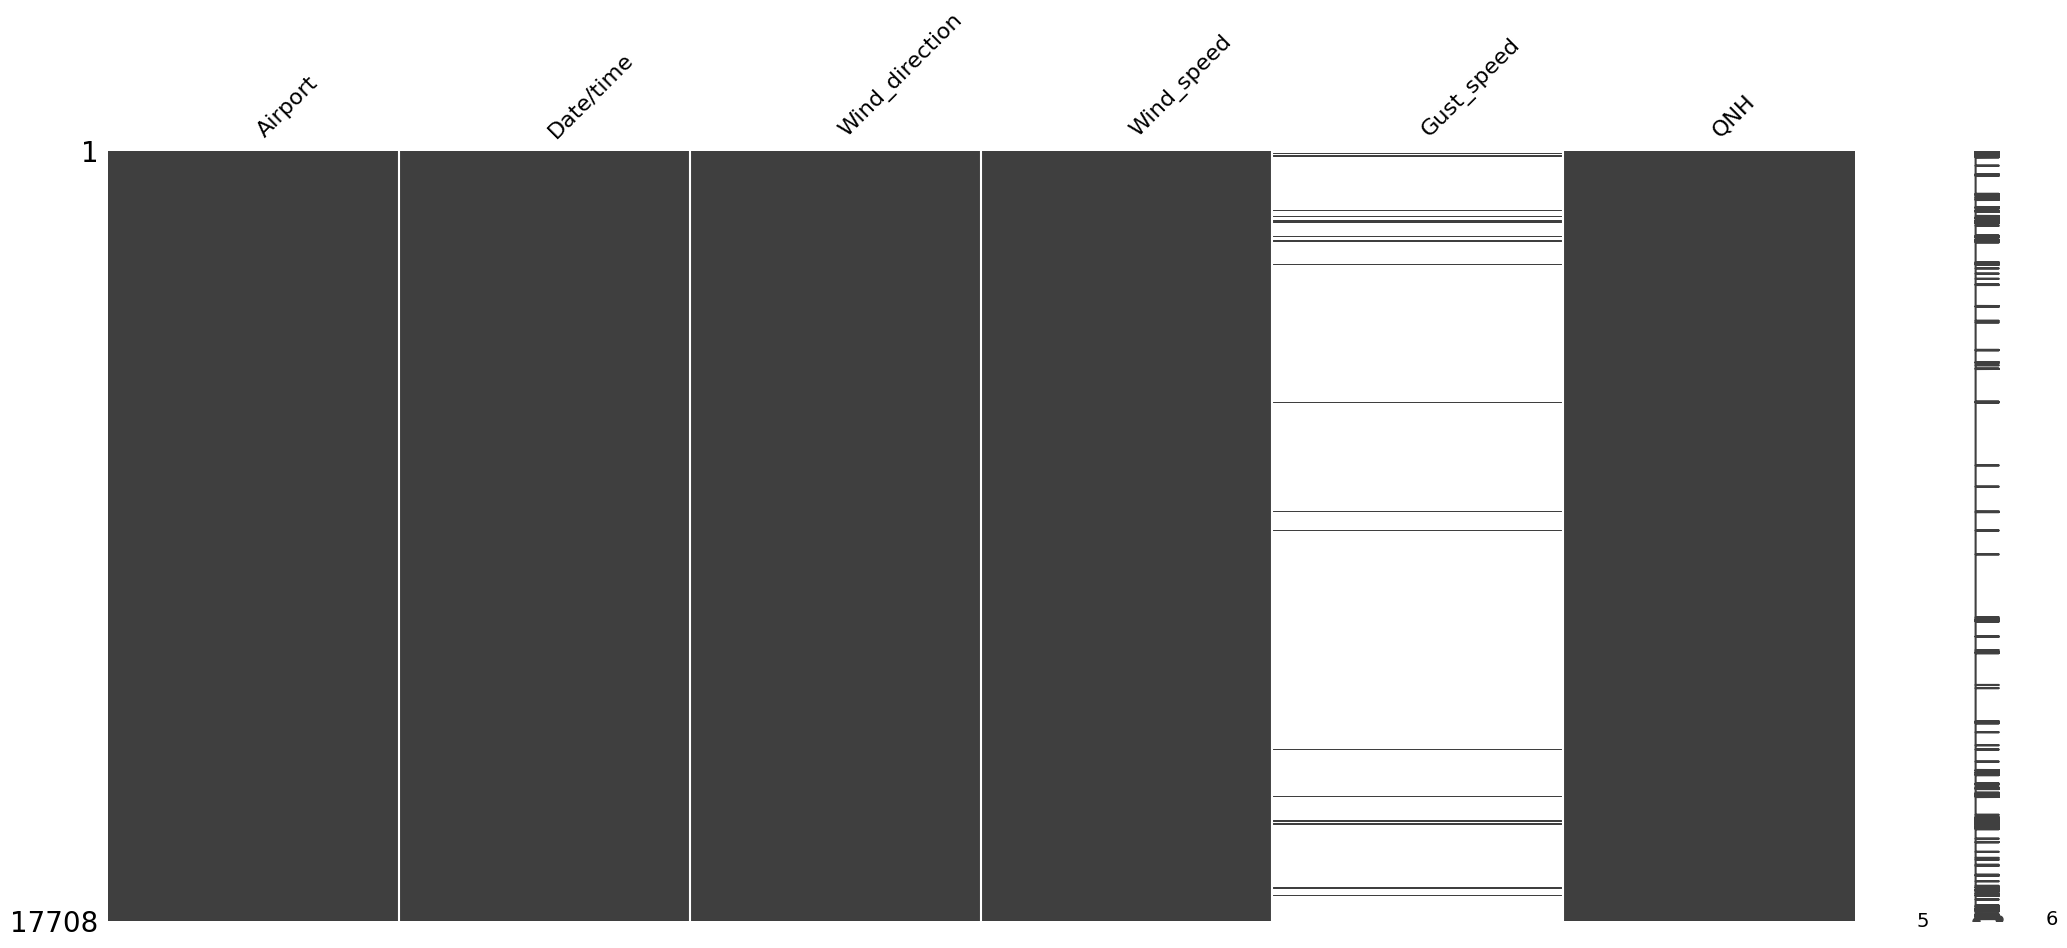

In [7]:
# Identifiserer missing data
print("Tilfeller av missing data")
print(df_ENOL.isnull().sum())

print("Tilfeller av registrert data")
print(df_ENOL.count())

print("Matrise for visualisering av missing data")
msno.matrix(df_ENOL)


In [8]:
# Drop duplicates
df_ENOL = df_ENOL.drop_duplicates(subset=["Date/time"], keep="last")
df_ENOL.shape

(1493, 6)

In [9]:
# Sorterer dataframen etter dato 
df_ENOL.sort_values(by=['Airport'], inplace=True)
df_ENOL.reset_index(drop=True, inplace=True)

In [10]:
# Fjerner unødvendige kolonner
df_ENOL = df_ENOL.drop(columns=['Airport', 'Date/time'])
print(df_ENOL.isnull().sum(axis=0)* 100/len(df_ENOL))

Wind_direction     0.000000
Wind_speed         0.000000
Gust_speed        90.689886
QNH                0.000000
dtype: float64


<Axes: >

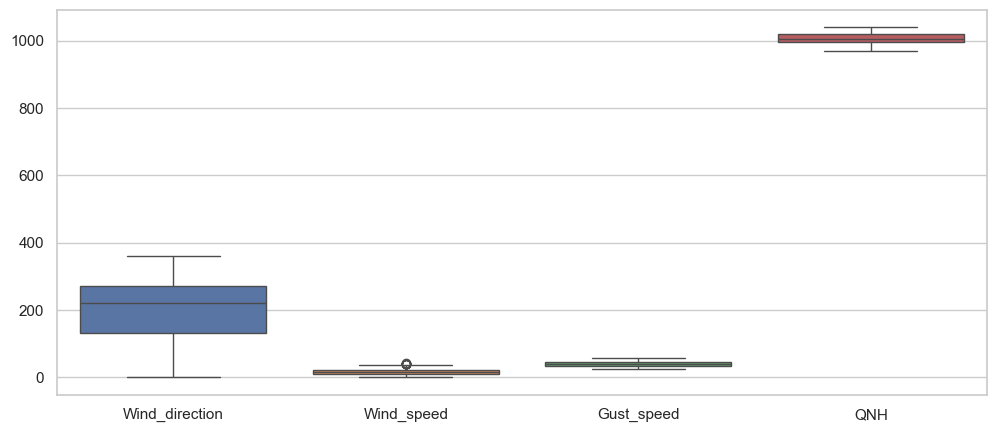

In [11]:
# Visualiserer data
sns.set(rc={'figure.figsize':(12,5)}, style='whitegrid')
sns.boxplot(data=df_ENOL)

In [12]:
df_ENOL = df_ENOL[df_ENOL['Wind_speed'] > 0]
df_ENOL = df_ENOL[df_ENOL['Gust_speed'] > 0]
df_ENOL = df_ENOL[df_ENOL['Wind_direction'] > 0]
df_ENOL = df_ENOL[df_ENOL['Wind_direction'] < 360]

df_ENOL.reset_index(inplace=True, drop=True)
df_ENOL.shape


(139, 4)

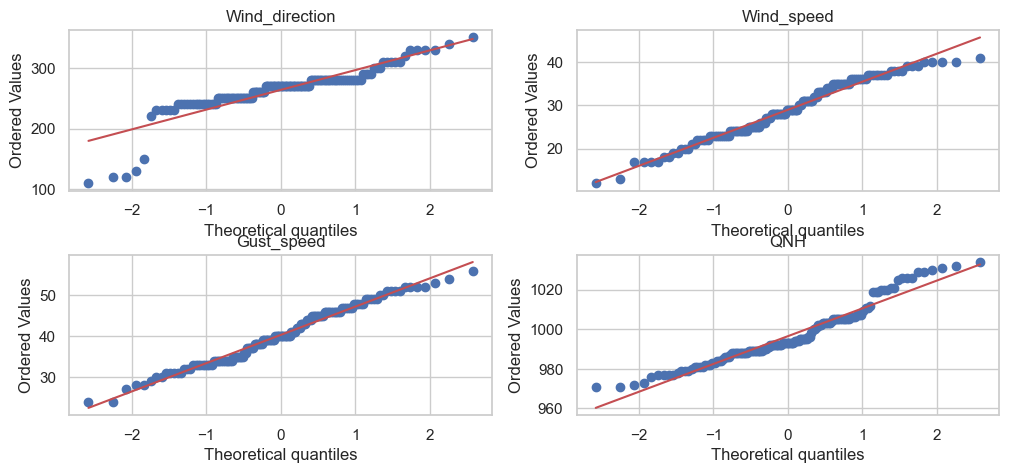

In [13]:
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(df_ENOL.columns):
    stats.probplot(df_ENOL[column], dist="norm", plot=axes[i//2, i%2])
    axes[int(i/2), i%2].set_title(column)
plt.show()

C:\Users\hanna\AppData\Local\Temp\ipykernel_25076\3184702607.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_ENOL.hist(ax=axes[int(i/2)][i%2])


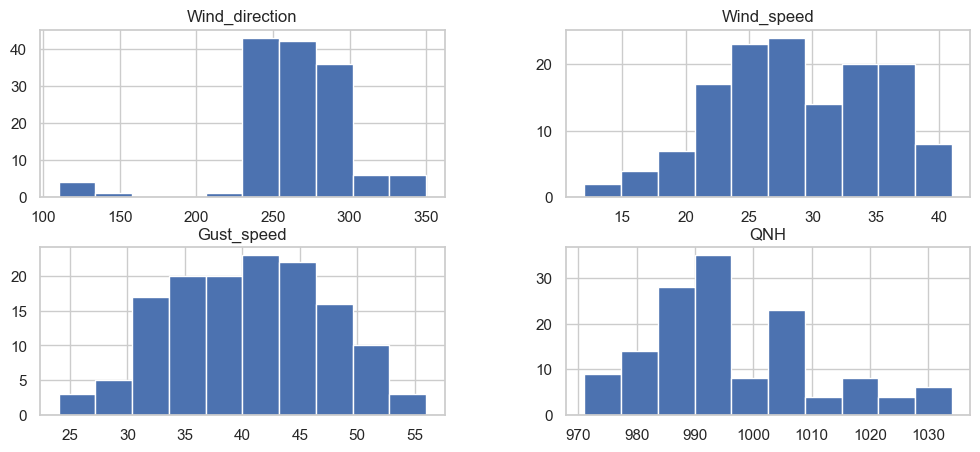

In [14]:
fig, axes = plt.subplots(2,2)
df_ENOL.hist(ax=axes[int(i/2)][i%2])
plt.show()